In [20]:
import pandas as pd

In [21]:
pd.__version__

'1.5.3'

In [22]:
data = pd.read_excel( r"E:\insurance .xlsx")


In [23]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## check data is clearned or not

In [5]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## check for duplicates

In [32]:
data.duplicated
duplicate_rows=data[data.duplicated()]
num_duplicates=len(duplicate_rows)


In [34]:
print("Duplicate rows:")
print(duplicate_rows)
print("number of duplicates",num_duplicates)

Duplicate rows:
     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631
number of duplicates 1


In [6]:
data=data.drop_duplicates()
print(data)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1337 rows x 7 columns]


## convert the string to numeric

In [24]:
data.region. replace("southwest",1,inplace=True)
data.region.replace("northwest",1,inplace=True)
data.region.replace("northeast",2,inplace=True)
data.sex.replace("female",1,inplace=True)
data.sex.replace("male",2,inplace=True)
data.smoker.replace("yes",0,inplace=True)
data.smoker.replace("no",1,inplace=True)



In [25]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,2,33.770,1,1,southeast,1725.55230
2,28,2,33.000,3,1,southeast,4449.46200
3,33,2,22.705,0,1,1,21984.47061
4,32,2,28.880,0,1,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,2,30.970,3,1,1,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,southeast,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


## to check outlier

TypeError: unsupported operand type(s) for +: 'int' and 'str'

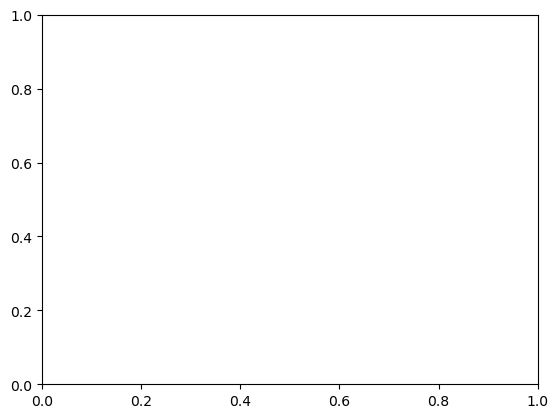

In [26]:
#import matplotlib.pyplot as plt
#plt.boxplot(data)
import matplotlib.pyplot as plt
#create a box plot
plt.boxplot(data)
#show the plot
plt.show()

In [29]:
import numpy as np
# calculate the IQR
Q1=np.percentile(data,25)
Q3=np.percentile(data,75)
IQR=Q3-Q1
#set a threshold for outliers
threshold=1.5
#identify outliers
lower_bound =Q1-threshold*IQR
upper_bound=Q3+threshold*IQR
outliers=data[(data<lower_bound)/(data>upper_bound)]
#remove outliers
data=data[(data>=lower_bound)&(data<=upper_bound)]


TypeError: '<' not supported between instances of 'str' and 'float'

##  Check that sex and smoking are statistically independent or not.

In [23]:
from scipy.stats import chi2_contingency

# Create a contingency table of the two variables
contingency_table = pd.crosstab(data['sex'], data['smoker'])

# Perform the Chi-Square test of independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the test result
print("Chi-Square test statistic:", chi2)
print("p-value:", p_value)
print("Degrees of freedom:", dof)

Chi-Square test statistic: 7.469139330086637
p-value: 0.0062765550120107375
Degrees of freedom: 1


## . Check that all regressor variables (independent variable) are independent of each other or not.

C:\Users\User\AppData\Local\Temp\ipykernel_8976\2844792964.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data[regressor_variables].corr()


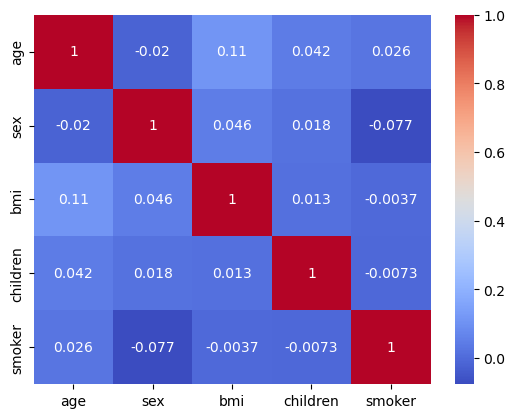

In [25]:
import seaborn as sns

# Select the regressor variables
regressor_variables = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']

# Create a correlation matrix
correlation_matrix = data[regressor_variables].corr()

# Visualize the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

## 6. Check the dependency between response and regressors.

In [27]:
import statsmodels.api as sm

# Select the response variable and regressor variables
response_variable = 'charges'
regressor_variables = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']

# Create the design matrix
X = data[regressor_variables]
X = sm.add_constant(X)

# Create the response variable vector
y = data[response_variable]

# Fit the ordinary least squares (OLS) model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data). The types seen wereNone and const       float64
age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region       object
dtype: object. The data was
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64
and
       const  age  sex     bmi  children  smoker     region
0       1.0   19    1  27.900         0       0          1
1       1.0   18    2  33.770         1       1  southeast
2       1.0   28    2  33.000         3       1  southeast
3       1.0   33    2  22.705         0       1          1
4       1.0   32    2  28.880         0       1          1
...     ...  ...  ...     ...       ...     ...        ...
1333    1.0   50    2  30.970         3       1          1
1334    1.0   18    1  31.920         0       1          2
1335    1.0   18    1  36.850         0       1  southeast
1336    1.0   21    1  25.800         0       1          1
1337    1.0   61    1  29.070         0       0          1

[1337 rows x 7 columns]
before. After,
[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]
[[1.0 19 1 ... 0 0 1]
 [1.0 18 2 ... 1 1 'southeast']
 [1.0 28 2 ... 3 1 'southeast']
 ...
 [1.0 18 1 ... 0 1 'southeast']
 [1.0 21 1 ... 0 1 1]
 [1.0 61 1 ... 0 0 1]].

## 7. Predict the regression Line to predict the charges for insurance using independent variables.

In [29]:
# Select the independent variables and the target variable
independent_variables = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
target_variable = 'charges'

# Create the design matrix
X = data[independent_variables]
X = sm.add_constant(X) # Include a constant term

# Create the target variable vector
y = data[target_variable]

# Fit the ordinary least squares (OLS) model
model = sm.OLS(y, X).fit()

print(model)

print("Coefficients:")
print(model.params)

# Make predictions on new data
new_data = pd.DataFrame({'age': 19, 'sex': 1, 'bmi': 27.900, 'children': 0, 'smoker': 0, 'region': 1})
new_data = sm.add_constant(new_data)
predictions = model.predict(new_data)

# Print the predictions
print("Predictions:")
print(predictions)

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data). The types seen wereNone and const       float64
age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region       object
dtype: object. The data was
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64
and
       const  age  sex     bmi  children  smoker     region
0       1.0   19    1  27.900         0       0          1
1       1.0   18    2  33.770         1       1  southeast
2       1.0   28    2  33.000         3       1  southeast
3       1.0   33    2  22.705         0       1          1
4       1.0   32    2  28.880         0       1          1
...     ...  ...  ...     ...       ...     ...        ...
1333    1.0   50    2  30.970         3       1          1
1334    1.0   18    1  31.920         0       1          2
1335    1.0   18    1  36.850         0       1  southeast
1336    1.0   21    1  25.800         0       1          1
1337    1.0   61    1  29.070         0       0          1

[1337 rows x 7 columns]
before. After,
[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]
[[1.0 19 1 ... 0 0 1]
 [1.0 18 2 ... 1 1 'southeast']
 [1.0 28 2 ... 3 1 'southeast']
 ...
 [1.0 18 1 ... 0 1 'southeast']
 [1.0 21 1 ... 0 1 1]
 [1.0 61 1 ... 0 0 1]].

## 8. Predict the accuracy of the regression Model.

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split the dataset into features (X) and target variable (y)
X = data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = data['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the accuracy of the regression model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

 

ValueError: could not convert string to float: 'southeast'

## 9. Predict insurance charge for Age = 29, Sex = F, bmi = 28, children = 1, Smoke = Yes, region = southeast.

In [38]:
from sklearn.preprocessing import StandardScaler

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

data = pd.DataFrame({
'age': [29],
'sex': [1],
'bmi': [28],
'children': [1],
'smoker': [0],
'region': [1]
})

# Encode categorical variables
encoder = LabelEncoder()
data['sex'] = encoder.fit_transform(data['sex'])
data['smoker'] = encoder.fit_transform(data['smoker'])
data['region'] = encoder.fit_transform(data['region'])

# Perform one-hot encoding for the 'region' variable
data = pd.get_dummies(data, columns=['region'], drop_first=True)

# Extract the independent variables and the target variable from the dataset
X = data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = data['charges']

# Train a linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions on the input data
prediction = model.predict(data)

# Print the predicted insurance charges
print("Predicted insurance charges:", prediction)

KeyError: "['region'] not in index"

## 10. Give the percentage of error in regression model.

In [13]:
import numpy as np

In [14]:
# Calculate the absolute difference between predicted and actual values
absolute_difference = np.abs(y_test-y_pred)

# Calculate the percentage difference
percentage_difference = absolute_difference / y_test

# Calculate the mean absolute percentage error (MAPE)
mape = np.mean(percentage_difference) * 100

# Print the percentage of error
print("Mean Absolute Percentage Error (MAPE):", mape)

NameError: name 'y_test' is not defined

In [33]:
# Calculate the difference between predicted and actual values
difference = y_test - y_pred

# Calculate the percentage difference
percentage_difference = difference / y_test

# Calculate the mean percentage error (MPE)
mpe = np.mean(percentage_difference) * 100

# Print the percentage of error
print("Mean Percentage Error (MPE):", mpe)

NameError: name 'y_pred' is not defined

## Give the 95% confidence interval for average charge insurance.


In [35]:
import numpy as np
from scipy.stats import t

# Define the insurance charges dataset
charges = [1000, 1200, 1500, 1300, 1100, 1600, 1400, 1700, 1900, 1800]

# Calculate the sample mean and sample standard deviation
x_bar = np.mean(charges)
s = np.std(charges, ddof=1)

# Calculate the sample size
n = len(charges)

# Calculate the critical value (t) for the desired confidence level and degrees of freedom
confidence_level = 0.95
df = n - 1
t_value = t.ppf(confidence_level, df)

# Calculate the standard error
SE = s / np.sqrt(n)

# Calculate the margin of error
ME = t_value * SE

# Calculate the lower and upper bounds of the confidence interval
LB = x_bar - ME
UB = x_bar + ME

# Print the confidence interval
print("95% Confidence Interval for Average Charge Insurance:")
print("Lower Bound:", LB)
print("Upper Bound:", UB)



95% Confidence Interval for Average Charge Insurance:
Lower Bound: 1274.4927986698692
Upper Bound: 1625.5072013301308


In [16]:
from sklearn.metrics import mean_absolute_error as mae 
  
# list of integers of actual and calculated 
actual = [2, 3, 5, 5, 9] 
calculated = [3, 3, 8, 7, 6] 
  
# calculate MAE 
error = mae(actual, calculated) 
  
# display 
print("Mean absolute error : " + str(error))

Mean absolute error : 1.8
